Import necessary packages for this analysis

In [1]:
import yfinance as yf
import pandas as pd
import pyfolio as pf
import warnings
warnings.filterwarnings("ignore")

Use yFinance to download historical stock data for the portfolio

In [2]:
data = yf.download(
    ["AAPL", "GOOG", "CRM","NOW", "AXP", "META", "SNOW", "NFLX", "FSLR", "CVX", "VRTX", "PYPL",\
     "MSFT", "QCOM", "UNH", "AMGN", "SPY"],
    start="2024-01-01",
    end="2024-12-13"
)

returns = data["Adj Close"].pct_change().dropna()

display(returns)

[*********************100%***********************]  17 of 17 completed


Ticker,AAPL,AMGN,AXP,CRM,CVX,FSLR,GOOG,META,MSFT,NFLX,NOW,PYPL,QCOM,SNOW,SPY,UNH,VRTX
Date,,,,,,,,,,,,,,,,,
2024-01-03 00:00:00+00:00,-0.007488,0.011096,-0.010568,-0.016749,0.019066,-0.027533,0.005732,-0.005256,-0.000728,0.003757,-0.017774,-0.046046,-0.018755,-0.025962,-0.008167,0.004988,-0.000487
2024-01-04 00:00:00+00:00,-0.012700,0.008248,0.007646,-0.002382,-0.010963,-0.006630,-0.016529,0.007693,-0.007178,0.009378,-0.005079,-0.003070,-0.010392,-0.002660,-0.003221,0.006254,0.013245
2024-01-05 00:00:00+00:00,-0.004013,-0.000561,0.010260,-0.000478,-0.001726,0.003367,-0.004709,0.013914,-0.000516,-0.001285,0.006385,0.028571,0.004113,0.029393,0.001370,-0.014741,0.000841
2024-01-08 00:00:00+00:00,0.024175,0.026007,0.000794,0.038826,-0.005984,-0.004435,0.022855,0.019065,0.018872,0.023141,0.029727,0.026946,0.016821,0.038230,0.014276,-0.001600,0.006291
2024-01-09 00:00:00+00:00,-0.002263,-0.011644,-0.012896,0.001802,-0.025418,0.004695,0.014445,-0.003430,0.002936,-0.006061,0.003461,-0.011176,0.006186,0.002801,-0.001517,0.003448,0.004509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-06 00:00:00+00:00,-0.000823,-0.006379,0.011513,0.001688,-0.025670,-0.018896,0.012506,0.024371,0.002146,0.018380,0.000552,0.009377,-0.005487,0.003168,0.001896,-0.050693,0.004740
2024-12-09 00:00:00+00:00,0.016101,0.018527,-0.023915,-0.028785,0.011853,0.029919,0.004595,-0.016352,0.005523,-0.022520,-0.003433,0.001335,0.007711,-0.015683,-0.005150,0.023926,0.025709
2024-12-10 00:00:00+00:00,0.004134,-0.006772,0.018165,-0.007822,-0.000509,0.014600,0.053247,0.009371,-0.006031,-0.000372,0.006569,-0.013778,-0.026627,-0.050951,-0.003109,0.008152,-0.010043


In [3]:
benchmark_rets = returns.pop("SPY")
portfolio_returns = returns.sum(axis=1)
print(portfolio_returns)

Date
2024-01-03 00:00:00+00:00   -0.132706
2024-01-04 00:00:00+00:00   -0.025120
2024-01-05 00:00:00+00:00    0.068815
2024-01-08 00:00:00+00:00    0.279729
2024-01-09 00:00:00+00:00   -0.028605
                               ...   
2024-12-06 00:00:00+00:00   -0.019506
2024-12-09 00:00:00+00:00    0.034511
2024-12-10 00:00:00+00:00   -0.008668
2024-12-11 00:00:00+00:00    0.109728
2024-12-12 00:00:00+00:00   -0.128814
Length: 239, dtype: float64


Generate a DataFrame of daily positions for the specified stocks with a net position per day equal to 100.

In [ ]:
import numpy as np
dates = pd.date_range(start="2024-01-01", end="2024-12-13", freq='B')
positions = pd.DataFrame(100, index=dates, columns=["AXP", "CSCO", "GOOG"])
positions["cash"] = 0
display(positions)

Generate a detailed portfolio analysis with PyFolio

Start date,2024-01-03
End date,2024-12-12
Total months,11
,Backtest
Annual return,613.795%
Cumulative returns,544.971%
Annual volatility,245.864%
Sharpe ratio,2.12
Calmar ratio,7.45
Stability,0.21
Max drawdown,-82.378%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,82.38,2024-07-16,2024-08-05,2024-11-26,96
1,63.86,2024-02-15,2024-04-19,2024-05-15,65
2,54.10,2024-05-22,2024-05-30,2024-07-05,33
3,36.55,2024-01-29,2024-01-31,2024-02-09,10
4,26.25,2024-02-09,2024-02-13,2024-02-15,5


Stress Events,mean,min,max
Covid,2.06%,-47.88%,41.65%


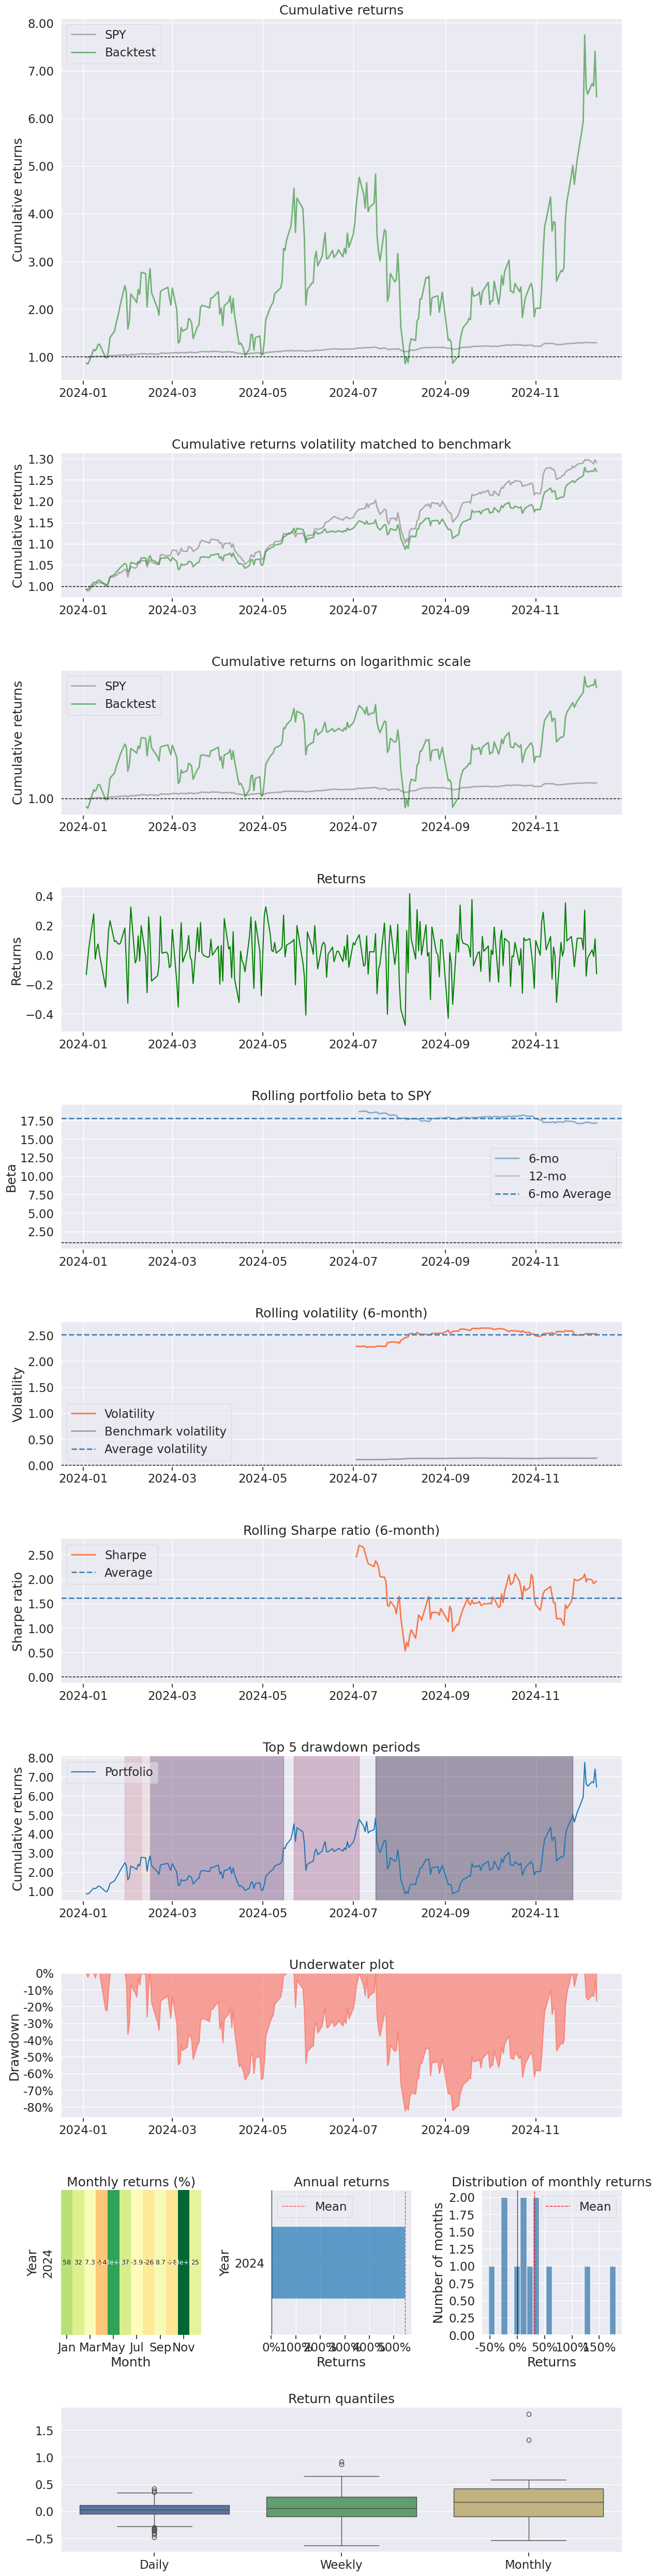

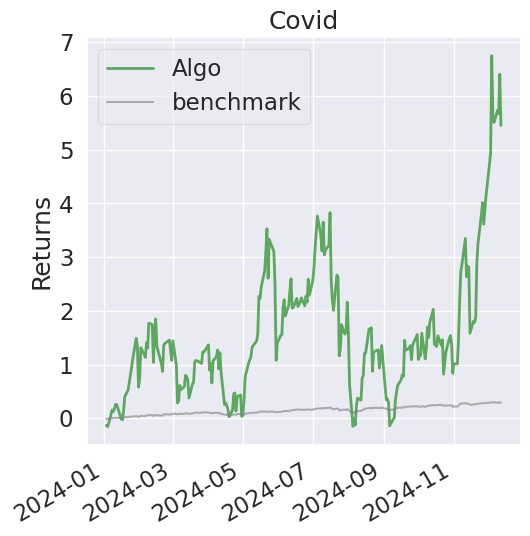

In [4]:
pf.create_full_tear_sheet(
    portfolio_returns,
    benchmark_rets=benchmark_rets
)